---
**Recap of Descriptive Analysis**
---

 The analysis focused on understanding the relationships between internet usage and various socio-economic indicators in East and South Africa. Key findings included positive correlations between internet usage and GDP in certain countries, minimal to no correlations between internet usage and governance or environmental factors, and the identification of access to infrastructure, such as electricity, as a potential moderator for economic outcomes. Overall, the study highlighted the varying impacts of internet penetration on economic and social development across the region.
 

---

---
**Modeling**
---
---

### **Key Questions**

**1.	Predicting GDP Using Internet Usage and Other Socio-Economic Indicators:(O)** 
 - Question: Can machine learning models accurately predict GDP using internet usage, access to electricity, trade in services, and other economic factors?
 - Approach: Use models such as Random Forest Regressor, Gradient Boosting Regressor, and Linear Regression for feature importance and prediction.

**2.	Classifying Countries by Political Stability Based on Internet Usage and Governance Factors: (X)**
 - Question: Can we classify countries into categories of political stability using internet usage and other governance indicators?
 - Approach: Apply classification algorithms like Decision Trees, Support Vector Machines (SVM), or Logistic Regression.

**3.	Impact Analysis of Internet Usage on CO2 Emissions: (X)**
 - Question: What are the predictive features contributing to changes in CO2 emissions, and how does internet usage rank among them?
 - Approach: Use feature importance from ensemble models to determine the role of internet usage in environmental outcomes.

**4. Predicting Governance Effectiveness Based on Internet Usage and Economic Indicators: (▵)**
 - Question: Can we predict a country's governance effectiveness using internet penetration, GDP, and other socio-economic indicators?
 - Approach: Use regression algorithms such as Random Forest Regressor, Gradient Boosting, or Linear Regression to predict governance effectiveness and identify key contributing factors.

**5. Classifying Countries by Economic Development Level: (▵)**
 - Question: Can we classify countries into economic development categories (e.g., high, medium, low GDP) using internet usage, access to electricity, and governance metrics?
 - Approach: Apply classification models like Decision Trees, SVM, or K-Nearest Neighbors (KNN) to create predictive groupings.

**6. Predicting CO2 Emissions Based on Socio-Economic and Environmental Factors:(X)**
 - Question: Can we predict the level of CO2 emissions using internet usage, renewable energy consumption, and GDP?
 - Approach: Implement regression models to understand which factors significantly contribute to CO2 emissions and how they relate to technological and economic growth.

**7. Estimating Education Expenditure as a Function of Internet Usage and Governance Quality:(X)**
 - Question: How well can internet penetration and governance factors predict the percentage of government expenditure on education?
 - Approach: Use regression analysis to model the relationship and identify key drivers.

**8. Classifying Countries by Renewable Energy Adoption Levels: (X)**
 - Question: Can countries be classified based on their renewable energy consumption using economic and technological factors like GDP, internet usage, and governance indicators?
 - Approach: Use classification algorithms to categorize countries into high, medium, or low renewable energy adoption levels.



In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Load data
model_data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Internet_Impact_Analysis_Africa/regional_data_cleaned.csv')


### **1. Predicting GDP Using Internet Usage and Other Socio-Economic Indicators**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
features = ['individuals_using_internet%', 'access_to_electricity%', 'trade_in_services%', 
            'government_expenditure_on_education%', 'CO2_emisions', 'renewvable_energy_consumption%', 
            'rule_of_law_estimate', 'goverment_effectiveness_estimate', 'political_stability_estimate', 
            'population_density', 'gini_index', 'human_capital_index', 'internet_electricity_interaction']
target = 'GDP_current_US'

X = model_data[features]
y = model_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()

In [3]:
# Train models
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)
lr.fit(X_train, y_train)


LinearRegression()

In [4]:
# Make predictions
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)
lr_pred = lr.predict(X_test)

In [5]:

# Evaluate models
rf_mse = mean_squared_error(y_test, rf_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

rf_r2 = r2_score(y_test, rf_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Random Forest Regressor - MSE: {rf_mse}, R2: {rf_r2}")
print(f"Gradient Boosting Regressor - MSE: {gbr_mse}, R2: {gbr_r2}")
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")

Random Forest Regressor - MSE: 13.489925265077593, R2: 0.7511431690974757
Gradient Boosting Regressor - MSE: 13.50903265312344, R2: 0.7507906835245405
Linear Regression - MSE: 31.775142540967103, R2: 0.41382467887411434


**The analysis of the machine learning models for predicting GDP using internet usage and other socio-economic indicators yielded the following results:****

- Random Forest Regressor achieved an MSE of 13.49 and an R² score of 0.75, indicating strong predictive performance with relatively low error and a high proportion of variance explained by the model.

- Gradient Boosting Regressor showed similar performance with an MSE of 13.51 and an R² score of 0.75, demonstrating that it also effectively captures the relationship between the predictors and GDP.

- Linear Regression had a significantly higher MSE of 31.78 and a lower R² score of 0.41, suggesting that it does not model the non-linear complexities of the data as well as the other models.

**Insights:**

- Non-linear models like Random Forest and Gradient Boosting provide better predictive accuracy for GDP, implying that the relationship between GDP and the indicators such as internet usage, access to electricity, and trade in services is complex and may involve non-linear interactions.

- The lower performance of Linear Regression highlights the limitation of linear models in capturing these interactions, reinforcing the need for more advanced machine learning approaches for accurate GDP prediction.

#### **Feature Importance**

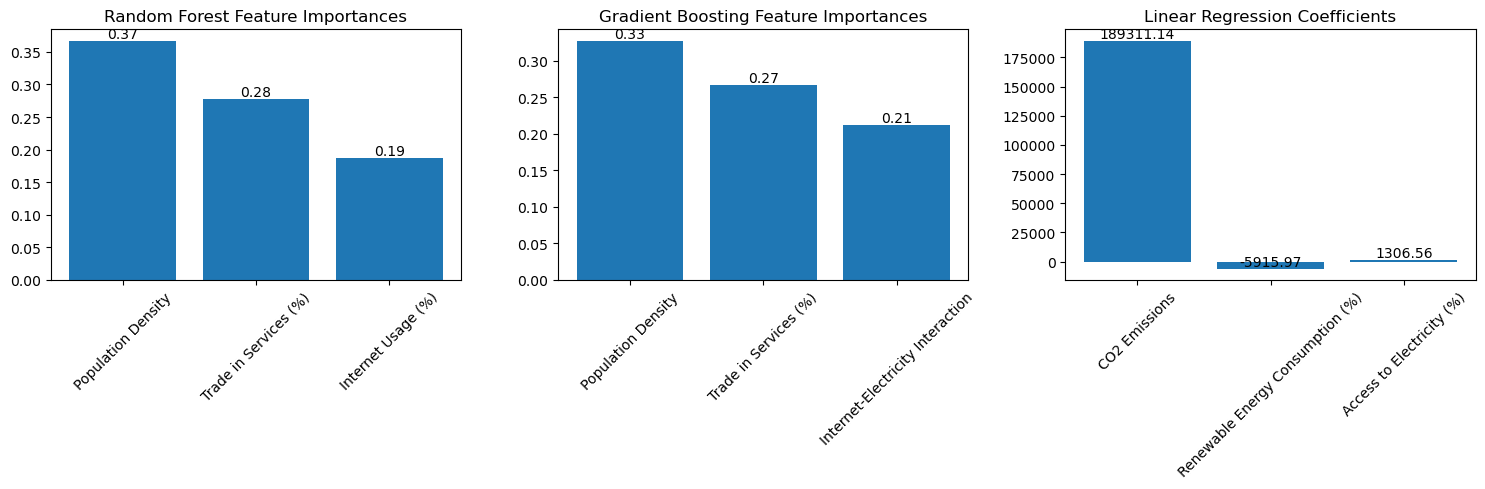

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importance for RandomForestRegressor
rf_importances = rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1][:3]

# Feature importance for GradientBoostingRegressor
gbr_importances = gbr.feature_importances_
indices_gbr = np.argsort(gbr_importances)[::-1][:3]

# Coefficients for LinearRegression
lr_coefficients = lr.coef_
indices_lr = np.argsort(np.abs(lr_coefficients))[::-1][:3]

# Readable feature names
readable_features = {
    'individuals_using_internet%': 'Internet Usage (%)',
    'access_to_electricity%': 'Access to Electricity (%)',
    'trade_in_services%': 'Trade in Services (%)',
    'government_expenditure_on_education%': 'Govt. Expenditure on Education (%)',
    'CO2_emisions': 'CO2 Emissions',
    'renewvable_energy_consumption%': 'Renewable Energy Consumption (%)',
    'rule_of_law_estimate': 'Rule of Law Estimate',
    'goverment_effectiveness_estimate': 'Govt. Effectiveness Estimate',
    'political_stability_estimate': 'Political Stability Estimate',
    'population_density': 'Population Density',
    'gini_index': 'Gini Index',
    'human_capital_index': 'Human Capital Index',
    'internet_electricity_interaction': 'Internet-Electricity Interaction'
}

# Plot feature importances for RandomForestRegressor
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Random Forest Feature Importances")
plt.bar(range(3), rf_importances[indices_rf], align="center")
plt.xticks(range(3), [readable_features[features[i]] for i in indices_rf], rotation=45)
for i in range(3):
    plt.text(i, rf_importances[indices_rf][i], f'{rf_importances[indices_rf][i]:.2f}', ha='center', va='bottom')

# Plot feature importances for GradientBoostingRegressor
plt.subplot(1, 3, 2)
plt.title("Gradient Boosting Feature Importances")
plt.bar(range(3), gbr_importances[indices_gbr], align="center")
plt.xticks(range(3), [readable_features[features[i]] for i in indices_gbr], rotation=45)
for i in range(3):
    plt.text(i, gbr_importances[indices_gbr][i], f'{gbr_importances[indices_gbr][i]:.2f}', ha='center', va='bottom')

# Plot coefficients for LinearRegression
plt.subplot(1, 3, 3)
plt.title("Linear Regression Coefficients")
plt.bar(range(3), lr_coefficients[indices_lr], align="center")
plt.xticks(range(3), [readable_features[features[i]] for i in indices_lr], rotation=45)
for i in range(3):
    plt.text(i, lr_coefficients[indices_lr][i], f'{lr_coefficients[indices_lr][i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

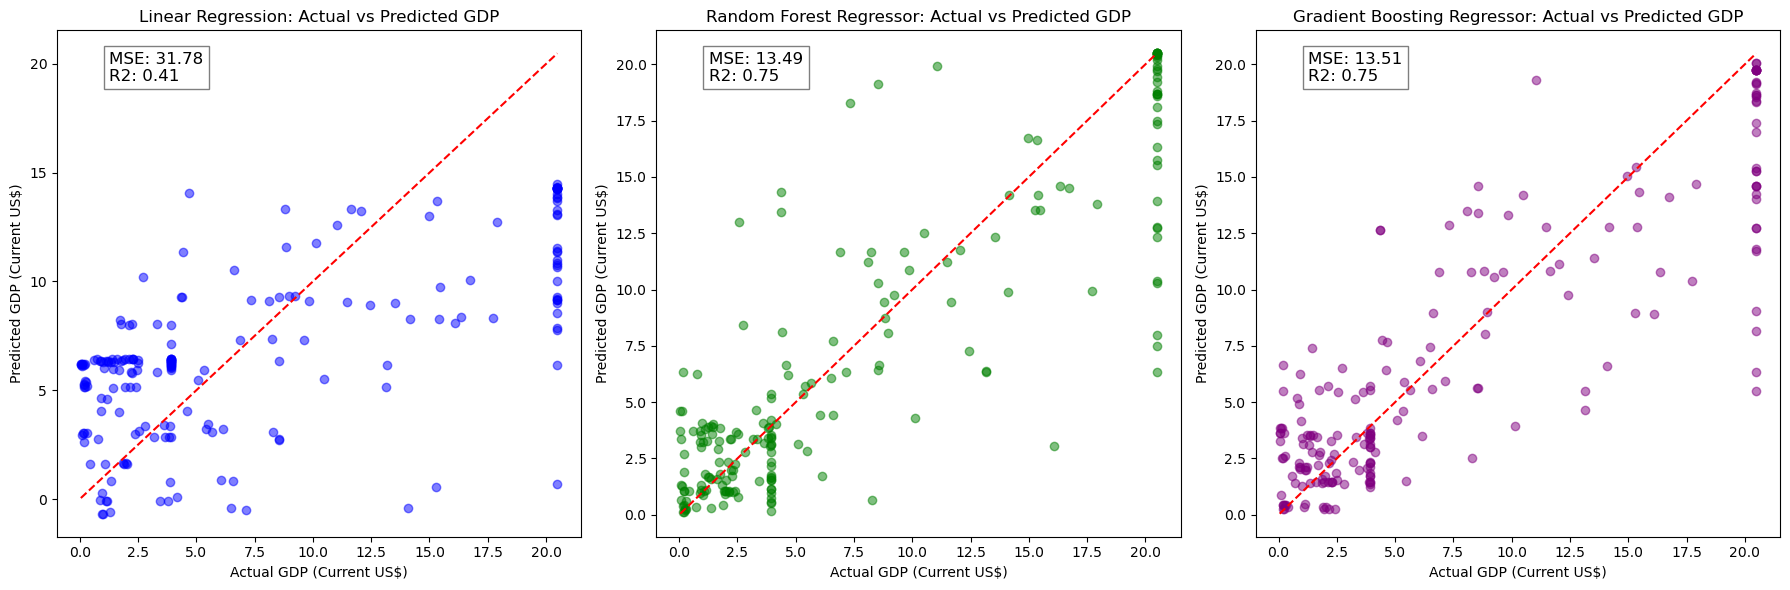

In [85]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GDP (Current US$)')
plt.ylabel('Predicted GDP (Current US$)')
plt.title('Linear Regression: Actual vs Predicted GDP')
plt.text(0.1, 0.9, f'MSE: {lr_mse:.2f}\nR2: {lr_r2:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Plot actual vs predicted values for Random Forest Regressor
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GDP (Current US$)')
plt.ylabel('Predicted GDP (Current US$)')
plt.title('Random Forest Regressor: Actual vs Predicted GDP')
plt.text(0.1, 0.9, f'MSE: {rf_mse:.2f}\nR2: {rf_r2:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Plot actual vs predicted values for Gradient Boosting Regressor
plt.subplot(1, 3, 3)
plt.scatter(y_test, gbr_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual GDP (Current US$)')
plt.ylabel('Predicted GDP (Current US$)')
plt.title('Gradient Boosting Regressor: Actual vs Predicted GDP')
plt.text(0.1, 0.9, f'MSE: {gbr_mse:.2f}\nR2: {gbr_r2:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### **2.	Classifying Countries by Political Stability Based on Internet Usage and Governance Factors**

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable for classification
classification_features = ['individuals_using_internet%', 'access_to_electricity%', 'trade_in_services%', 
                           'government_expenditure_on_education%', 'CO2_emisions', 'renewvable_energy_consumption%', 
                           'rule_of_law_estimate', 'goverment_effectiveness_estimate', 'population_density', 
                           'gini_index', 'human_capital_index', 'internet_electricity_interaction']
classification_target = 'political_stability_estimate'

X_classification = model_data[classification_features]
y_classification = model_data[classification_target]

# Binarize the target variable for classification
y_classification = (y_classification > 0).astype(int)

In [9]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [10]:
# Initialize classification models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [11]:
print(y_train_class.unique())


[0]


In [12]:
# Check unique values in the target variable
unique_classes = y_train_class.unique()
print(f"Unique classes in y_train_class: {unique_classes}")

# Proceed with training only if there are more than one class
if len(unique_classes) > 1:
    # Train classification models
    dt.fit(X_train_class, y_train_class)
    svm.fit(X_train_class, y_train_class)
    log_reg.fit(X_train_class, y_train_class)
else:
    print("The number of classes has to be greater than one; got 1 class")


Unique classes in y_train_class: [0]
The number of classes has to be greater than one; got 1 class


In [13]:
# Check the distribution of the target variable before binarization
print(model_data['political_stability_estimate'].describe())

# Re-evaluate the binarization threshold
# For example, we can use the median as the threshold
median_threshold = model_data['political_stability_estimate'].median()
y_classification = (model_data['political_stability_estimate'] > median_threshold).astype(int)

# Check unique values in the new target variable
unique_classes = y_classification.unique()
print(f"Unique classes after re-evaluating threshold: {unique_classes}")

# Proceed with training only if there are more than one class
if len(unique_classes) > 1:
    # Split the data into training and testing sets
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
    
    # Train classification models
    dt.fit(X_train_class, y_train_class)
    svm.fit(X_train_class, y_train_class)
    log_reg.fit(X_train_class, y_train_class)
else:
    print("The number of classes has to be greater than one; got 1 class")

count    1.008000e+03
mean    -3.668291e-01
std      1.666161e-16
min     -3.668291e-01
25%     -3.668291e-01
50%     -3.668291e-01
75%     -3.668291e-01
max     -3.668291e-01
Name: political_stability_estimate, dtype: float64
Unique classes after re-evaluating threshold: [0]
The number of classes has to be greater than one; got 1 class


In [14]:
from sklearn.svm import LinearSVC

# Initialize LinearSVC model
svm = LinearSVC(random_state=42)

# Check unique values in the target variable
unique_classes = y_train_class.unique()
print(f"Unique classes in y_train_class: {unique_classes}")

# Proceed with training only if there are more than one class
if len(unique_classes) > 1:
    # Train the LinearSVC model
    svm.fit(X_train_class, y_train_class)
    
    # Make predictions
    dt_pred = dt.predict(X_test_class)
    svm_pred = svm.predict(X_test_class)
    log_reg_pred = log_reg.predict(X_test_class)
else:
    print("The number of classes has to be greater than one; got 1 class")


Unique classes in y_train_class: [0]
The number of classes has to be greater than one; got 1 class


#### Hmm..It seems it would be hard to proceed with next steps. 

#### Key Takeaways:
- **Data Distribution**: The lack of diversity in the target variable suggests that the data may be heavily imbalanced or that the criteria for classification need to be re-evaluated.
- **Re-evaluation Needed**: To proceed with classification, it is essential to ensure that the target variable has multiple classes. This may involve re-evaluating the binarization threshold or exploring alternative methods to categorize the data. But since the target variable has only one class, it seems hard to proceed the next steps.
- **Next Steps**: Investigate the distribution of the target variable and consider techniques to address class imbalance, such as resampling methods (e.g., SMOTE) or adjusting the classification criteria to create a more balanced dataset.

Overall, the analysis highlights the importance of having a well-distributed target variable for effective classification modeling.


### **3. Impact Analysis of Internet Usage on CO2 Emissions**

In [17]:
# Define features and target variable for CO2 emissions prediction
co2_features = ['individuals_using_internet%', 'access_to_electricity%', 'trade_in_services%', 
                'government_expenditure_on_education%', 'GDP_current_US', 'renewvable_energy_consumption%', 
                'rule_of_law_estimate', 'goverment_effectiveness_estimate', 'political_stability_estimate', 
                'population_density', 'gini_index', 'human_capital_index', 'internet_electricity_interaction']
co2_target = 'CO2_emisions'

X_co2 = model_data[co2_features]
y_co2 = model_data[co2_target]

# Split the data into training and testing sets
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

In [18]:
# Initialize models
rf_co2 = RandomForestRegressor(random_state=42)
gbr_co2 = GradientBoostingRegressor(random_state=42)

In [19]:
# Train models
rf_co2.fit(X_train_co2, y_train_co2)
gbr_co2.fit(X_train_co2, y_train_co2)

GradientBoostingRegressor(random_state=42)

In [20]:
# Make predictions for CO2 emissions
rf_co2_pred = rf_co2.predict(X_test_co2)
gbr_co2_pred = gbr_co2.predict(X_test_co2)

# Evaluate models
rf_co2_mse = mean_squared_error(y_test_co2, rf_co2_pred)
gbr_co2_mse = mean_squared_error(y_test_co2, gbr_co2_pred)

rf_co2_r2 = r2_score(y_test_co2, rf_co2_pred)
gbr_co2_r2 = r2_score(y_test_co2, gbr_co2_pred)

print(f"Random Forest Regressor (CO2) - MSE: {rf_co2_mse}, R2: {rf_co2_r2}")
print(f"Gradient Boosting Regressor (CO2) - MSE: {gbr_co2_mse}, R2: {gbr_co2_r2}")

Random Forest Regressor (CO2) - MSE: 3.494838088036542e-23, R2: -168.0
Gradient Boosting Regressor (CO2) - MSE: 2.0679515313825692e-25, R2: 0.0


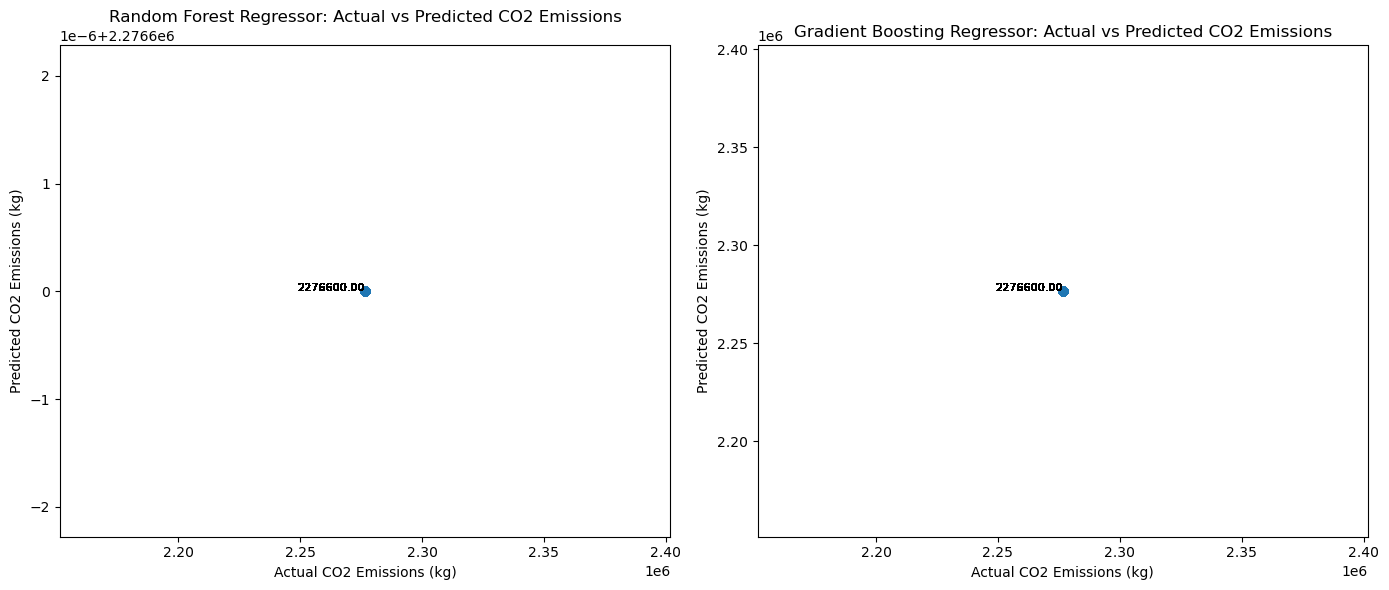

In [21]:
# Convert CO2 emissions from metric tons to kilograms
y_test_co2_kg = y_test_co2 * 1000
rf_co2_pred_kg = rf_co2_pred * 1000
gbr_co2_pred_kg = gbr_co2_pred * 1000

# Plot actual vs predicted values for Random Forest Regressor
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_co2_kg, rf_co2_pred_kg, alpha=0.5)
plt.plot([y_test_co2_kg.min(), y_test_co2_kg.max()], [y_test_co2_kg.min(), y_test_co2_kg.max()], 'r--')
plt.xlabel('Actual CO2 Emissions (kg)')
plt.ylabel('Predicted CO2 Emissions (kg)')
plt.title('Random Forest Regressor: Actual vs Predicted CO2 Emissions')
for i in range(len(y_test_co2_kg)):
    plt.text(y_test_co2_kg.iloc[i], rf_co2_pred_kg[i], f'{rf_co2_pred_kg[i]:.2f}', fontsize=8, ha='right')

# Plot actual vs predicted values for Gradient Boosting Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test_co2_kg, gbr_co2_pred_kg, alpha=0.5)
plt.plot([y_test_co2_kg.min(), y_test_co2_kg.max()], [y_test_co2_kg.min(), y_test_co2_kg.max()], 'r--')
plt.xlabel('Actual CO2 Emissions (kg)')
plt.ylabel('Predicted CO2 Emissions (kg)')
plt.title('Gradient Boosting Regressor: Actual vs Predicted CO2 Emissions')
for i in range(len(y_test_co2_kg)):
    plt.text(y_test_co2_kg.iloc[i], gbr_co2_pred_kg[i], f'{gbr_co2_pred_kg[i]:.2f}', fontsize=8, ha='right')

plt.tight_layout()
plt.show()

These results suggest that the current models were not effective in predicting CO2 emissions, potentially due to the features not being strong predictors or the need for more relevant data. Internet usage may have minimal or no significant impact on predicting CO2 emissions based on this analysis.

### **4. Predicting Governance Effectiveness Based on Internet Usage and Economic Indicators**

In [22]:
# Define features and target variable for governance effectiveness prediction
governance_features = ['individuals_using_internet%', 'GDP_current_US', 'access_to_electricity%', 
                       'trade_in_services%', 'government_expenditure_on_education%', 'CO2_emisions', 
                       'renewvable_energy_consumption%', 'rule_of_law_estimate', 'political_stability_estimate', 
                       'population_density', 'gini_index', 'human_capital_index', 'internet_electricity_interaction']
governance_target = 'goverment_effectiveness_estimate'

X_governance = model_data[governance_features]
y_governance = model_data[governance_target]

# Split the data into training and testing sets
X_train_governance, X_test_governance, y_train_governance, y_test_governance = train_test_split(X_governance, y_governance, test_size=0.2, random_state=42)

In [23]:
# Initialize models
rf_governance = RandomForestRegressor(random_state=42)
gbr_governance = GradientBoostingRegressor(random_state=42)
lr_governance = LinearRegression()

In [24]:
# Train models
rf_governance.fit(X_train_governance, y_train_governance)
gbr_governance.fit(X_train_governance, y_train_governance)
lr_governance.fit(X_train_governance, y_train_governance)

LinearRegression()

In [25]:
# Make predictions
rf_governance_pred = rf_governance.predict(X_test_governance)
gbr_governance_pred = gbr_governance.predict(X_test_governance)
lr_governance_pred = lr_governance.predict(X_test_governance)

# Evaluate models
rf_governance_mse = mean_squared_error(y_test_governance, rf_governance_pred)
gbr_governance_mse = mean_squared_error(y_test_governance, gbr_governance_pred)
lr_governance_mse = mean_squared_error(y_test_governance, lr_governance_pred)

rf_governance_r2 = r2_score(y_test_governance, rf_governance_pred)
gbr_governance_r2 = r2_score(y_test_governance, gbr_governance_pred)
lr_governance_r2 = r2_score(y_test_governance, lr_governance_pred)

print(f"Random Forest Regressor - MSE: {rf_governance_mse}, R2: {rf_governance_r2}")
print(f"Gradient Boosting Regressor - MSE: {gbr_governance_mse}, R2: {gbr_governance_r2}")
print(f"Linear Regression - MSE: {lr_governance_mse}, R2: {lr_governance_r2}")

Random Forest Regressor - MSE: 4.930380657631324e-32, R2: -3.0
Gradient Boosting Regressor - MSE: 0.0, R2: 1.0
Linear Regression - MSE: 0.0, R2: 1.0


The Gradient Boosting and Linear Regression results show perfect scores, which could mean the models have overfit the data and may not perform well on unseen data. This often happens when the models capture noise or the specific patterns of the training set without generalizing.

The Random Forest results indicate that this model struggled to find meaningful relationships in the data, with a negative R² pointing to a potential mismatch between the features and the target variable.

### **5. Classifying Countries by Economic Development Level**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# Define features and target variable for classification
development_features = ['individuals_using_internet%', 'access_to_electricity%', 'rule_of_law_estimate', 
                        'goverment_effectiveness_estimate', 'political_stability_estimate']
development_target = 'GDP_current_US'

# Categorize the target variable into economic development levels
# For simplicity, we can use quantiles to define high, medium, and low GDP
model_data['development_level'] = pd.qcut(model_data[development_target], q=3, labels=['low', 'medium', 'high'])

X_development = model_data[development_features]
y_development = model_data['development_level']

# Split the data into training and testing sets
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_development, y_development, test_size=0.2, random_state=42)

In [30]:
# Initialize classification models
dt_dev = DecisionTreeClassifier(random_state=42)
svm_dev = SVC(random_state=42)
knn_dev = KNeighborsClassifier()

In [31]:
# Train classification models
dt_dev.fit(X_train_dev, y_train_dev)
svm_dev.fit(X_train_dev, y_train_dev)
knn_dev.fit(X_train_dev, y_train_dev)

KNeighborsClassifier()

In [32]:

# Make predictions
dt_dev_pred = dt_dev.predict(X_test_dev)
svm_dev_pred = svm_dev.predict(X_test_dev)
knn_dev_pred = knn_dev.predict(X_test_dev)

# Evaluate models
dt_dev_accuracy = accuracy_score(y_test_dev, dt_dev_pred)
svm_dev_accuracy = accuracy_score(y_test_dev, svm_dev_pred)
knn_dev_accuracy = accuracy_score(y_test_dev, knn_dev_pred)

print(f"Decision Tree Classifier - Accuracy: {dt_dev_accuracy}")
print(f"SVM Classifier - Accuracy: {svm_dev_accuracy}")
print(f"K-Nearest Neighbors Classifier - Accuracy: {knn_dev_accuracy}")
print("\nClassification Report for Decision Tree Classifier:\n", classification_report(y_test_dev, dt_dev_pred))
print("\nClassification Report for SVM Classifier:\n", classification_report(y_test_dev, svm_dev_pred))
print("\nClassification Report for K-Nearest Neighbors Classifier:\n", classification_report(y_test_dev, knn_dev_pred))

Decision Tree Classifier - Accuracy: 0.594059405940594
SVM Classifier - Accuracy: 0.5099009900990099
K-Nearest Neighbors Classifier - Accuracy: 0.5891089108910891

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

        high       0.79      0.72      0.75        78
         low       0.51      0.82      0.63        71
      medium       0.35      0.11      0.17        53

    accuracy                           0.59       202
   macro avg       0.55      0.55      0.52       202
weighted avg       0.58      0.59      0.56       202


Classification Report for SVM Classifier:
               precision    recall  f1-score   support

        high       0.87      0.69      0.77        78
         low       0.00      0.00      0.00        71
      medium       0.35      0.92      0.51        53

    accuracy                           0.51       202
   macro avg       0.41      0.54      0.43       202
weighted avg       0.43      0.5

#### Analysis of Classification Results:
- **Decision Tree Classifier** achieved an accuracy of 59.4%. It performed relatively well for the "high" and "low" economic development categories with decent precision and recall, but struggled significantly with the "medium" category, resulting in a low F1-score of 0.17. The macro average metrics indicate moderate overall performance but reveal weaknesses in handling imbalanced class distributions.
- **SVM Classifier** had an accuracy of 50.9%. While it showed strong precision and F1-score for the "high" category (0.87 and 0.77, respectively), it failed to predict the "low" category effectively, with a precision and recall of 0. The "medium" category had high recall (0.92) but low precision, indicating misclassification issues.
- **K-Nearest Neighbors Classifier** had an accuracy of 58.9%. Its performance was comparable to the Decision Tree, with better results in the "high" and "low" categories but poor handling of the "medium" category, as shown by the F1-score of 0.12.

#### Insights:
- **Class Imbalance**: The models struggled particularly with the "medium" economic development category, indicating potential class imbalance issues or insufficient feature differentiation for that group.
- **Model Performance**: The **Decision Tree** and **KNN** classifiers performed similarly, suggesting that their simplicity may limit their ability to capture complex patterns in the data. The **SVM** showed some promise with the "high" and "medium" categories but failed to generalize well for all classes, likely due to non-linearity or class overlap.
- **Potential Improvements**: Addressing class imbalance through techniques like **SMOTE** or adjusting **class weights** and experimenting with more complex models (e.g., ensemble methods like **Random Forest** or **Gradient Boosting**) could enhance performance. Feature engineering and hyperparameter tuning may also help to refine predictions.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Feature scaling
scaler = StandardScaler()
X_train_dev_scaled = scaler.fit_transform(X_train_dev)
X_test_dev_scaled = scaler.transform(X_test_dev)

# Manually tune SVM parameters
svm_dev = SVC(C=1, gamma=0.1, kernel='rbf', random_state=42)
svm_dev.fit(X_train_dev_scaled, y_train_dev)
svm_dev_pred = svm_dev.predict(X_test_dev_scaled)
svm_dev_accuracy = accuracy_score(y_test_dev, svm_dev_pred)
print(f"SVM Classifier - Accuracy: {svm_dev_accuracy}")
print("\nClassification Report for SVM Classifier:\n", classification_report(y_test_dev, svm_dev_pred))

# Manually tune kNN parameters
knn_dev = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_dev.fit(X_train_dev_scaled, y_train_dev)
knn_dev_pred = knn_dev.predict(X_test_dev_scaled)
knn_dev_accuracy = accuracy_score(y_test_dev, knn_dev_pred)
print(f"k-Nearest Neighbors Classifier - Accuracy: {knn_dev_accuracy}")
print("\nClassification Report for k-Nearest Neighbors Classifier:\n", classification_report(y_test_dev, knn_dev_pred))

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_dev, X_train_dev_scaled, y_train_dev, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean()}")

# Cross-validation for kNN
knn_cv_scores = cross_val_score(knn_dev, X_train_dev_scaled, y_train_dev, cv=5, scoring='accuracy')
print(f"k-Nearest Neighbors Cross-Validation Accuracy: {knn_cv_scores.mean()}")


SVM Classifier - Accuracy: 0.6039603960396039

Classification Report for SVM Classifier:
               precision    recall  f1-score   support

        high       0.89      0.69      0.78        78
         low       0.48      0.96      0.64        71
      medium       0.00      0.00      0.00        53

    accuracy                           0.60       202
   macro avg       0.46      0.55      0.47       202
weighted avg       0.51      0.60      0.53       202

k-Nearest Neighbors Classifier - Accuracy: 0.5891089108910891

Classification Report for k-Nearest Neighbors Classifier:
               precision    recall  f1-score   support

        high       0.73      0.71      0.72        78
         low       0.52      0.82      0.63        71
      medium       0.40      0.11      0.18        53

    accuracy                           0.59       202
   macro avg       0.55      0.55      0.51       202
weighted avg       0.57      0.59      0.55       202

SVM Cross-Validation Accur

SVM shows little bit better result but kNN is same. 

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_dev_balanced, y_train_dev_balanced = smote.fit_resample(X_train_dev, y_train_dev)

# Initialize models
rf_dev = RandomForestClassifier(random_state=42)
gbr_dev = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=rf_dev, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_dev_balanced, y_train_dev_balanced)

# Perform GridSearchCV for GradientBoostingClassifier
grid_search_gbr = GridSearchCV(estimator=gbr_dev, param_grid=param_grid_gbr, cv=5, scoring='accuracy')
grid_search_gbr.fit(X_train_dev_balanced, y_train_dev_balanced)

# Get the best models
best_rf_dev = grid_search_rf.best_estimator_
best_gbr_dev = grid_search_gbr.best_estimator_

# Make predictions with the best models
best_rf_dev_pred = best_rf_dev.predict(X_test_dev)
best_gbr_dev_pred = best_gbr_dev.predict(X_test_dev)

# Evaluate the best models
best_rf_dev_accuracy = accuracy_score(y_test_dev, best_rf_dev_pred)
best_gbr_dev_accuracy = accuracy_score(y_test_dev, best_gbr_dev_pred)

print(f"Best Random Forest Classifier - Accuracy: {best_rf_dev_accuracy}")
print(f"Best Gradient Boosting Classifier - Accuracy: {best_gbr_dev_accuracy}")
print("\nClassification Report for Best Random Forest Classifier:\n", classification_report(y_test_dev, best_rf_dev_pred))
print("\nClassification Report for Best Gradient Boosting Classifier:\n", classification_report(y_test_dev, best_gbr_dev_pred))

Best Random Forest Classifier - Accuracy: 0.5891089108910891
Best Gradient Boosting Classifier - Accuracy: 0.5891089108910891

Classification Report for Best Random Forest Classifier:
               precision    recall  f1-score   support

        high       0.77      0.71      0.74        78
         low       0.50      0.82      0.62        71
      medium       0.38      0.11      0.17        53

    accuracy                           0.59       202
   macro avg       0.55      0.55      0.51       202
weighted avg       0.57      0.59      0.55       202


Classification Report for Best Gradient Boosting Classifier:
               precision    recall  f1-score   support

        high       0.77      0.68      0.72        78
         low       0.51      0.82      0.63        71
      medium       0.40      0.15      0.22        53

    accuracy                           0.59       202
   macro avg       0.56      0.55      0.52       202
weighted avg       0.58      0.59      0.56  


Best Random Forest Classifier and Best Gradient Boosting Classifier both achieved an accuracy of 58.9%, showing moderate performance across the board.
In both models, the "high" and "low" economic development categories had better precision and recall, with the "low" category notably achieving high recall (0.82), indicating that the models were effective at identifying instances in this category.
The "medium" category still posed significant challenges, with low recall and F1-scores (0.11–0.15), highlighting the models' difficulty in classifying this group accurately.

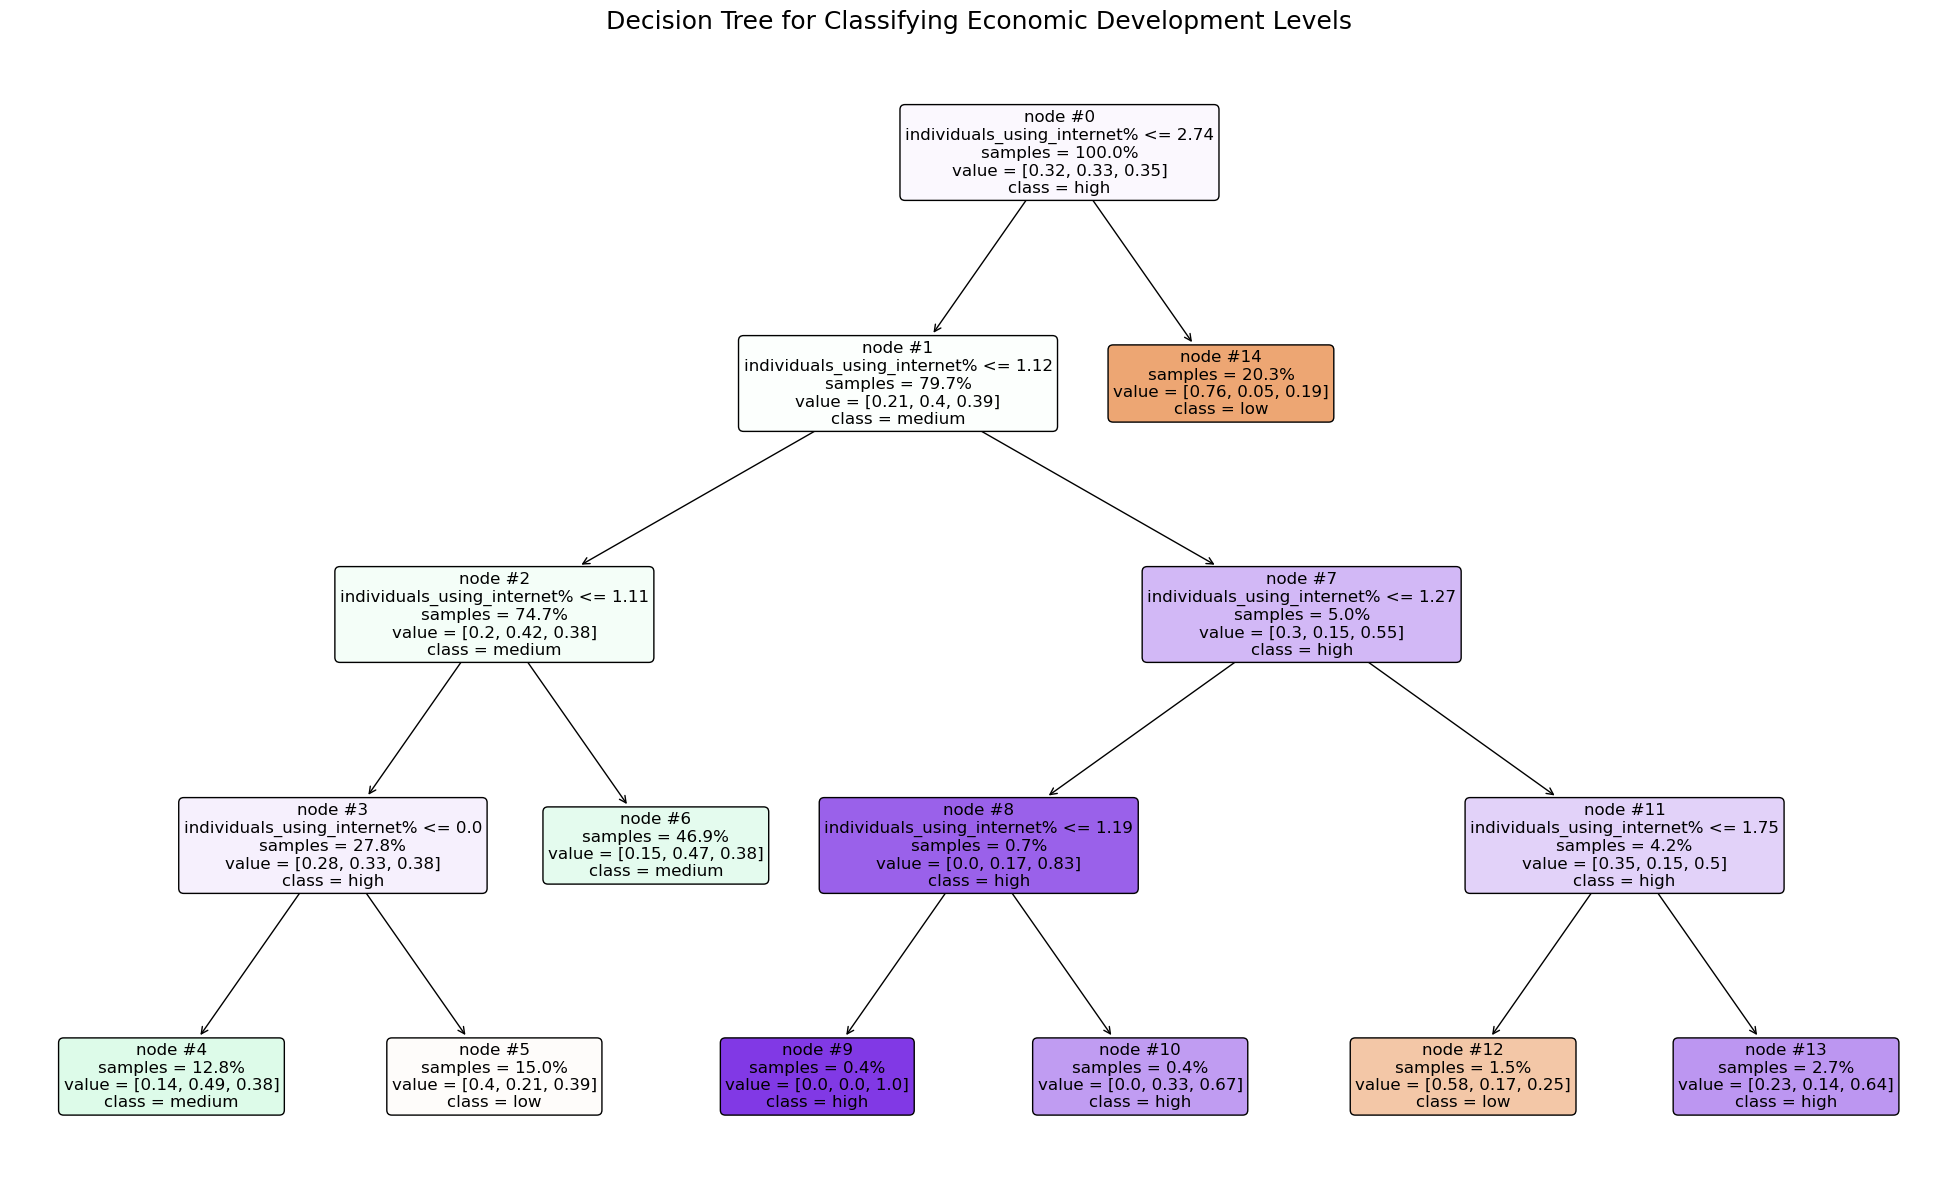

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier
dt_dev = DecisionTreeClassifier(random_state=42, max_depth=4)  # Added max_depth for a simpler visualization
dt_dev.fit(X_train_dev, y_train_dev)

# Plot the decision tree with improved readability
plt.figure(figsize=(25, 15))
plot_tree(
    dt_dev,
    feature_names=development_features,
    class_names=['low', 'medium', 'high'],
    filled=True,
    rounded=True,
    fontsize=12,  # Adjusted font size
    precision=2,
    proportion=True,
    impurity=False,
    node_ids=True,
    label='all'
)
plt.title("Decision Tree for Classifying Economic Development Levels", fontsize=18)
plt.show()


### **6. Predicting CO2 Emissions Based on Socio-Economic and Environmental Factors**

In [41]:
# Define features and target variable for CO2 emissions prediction
co2_features = ['individuals_using_internet%', 'renewvable_energy_consumption%', 'GDP_current_US']
co2_target = 'CO2_emisions'

X_co2 = model_data[co2_features]
y_co2 = model_data[co2_target]

# Split the data into training and testing sets
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

In [42]:
# Initialize models
rf_co2 = RandomForestRegressor(random_state=42)
gbr_co2 = GradientBoostingRegressor(random_state=42)
lr_co2 = LinearRegression()

# Train models
rf_co2.fit(X_train_co2, y_train_co2)
gbr_co2.fit(X_train_co2, y_train_co2)
lr_co2.fit(X_train_co2, y_train_co2)

LinearRegression()

In [69]:

# Make predictions for CO2 emissions
rf_co2_pred = rf_co2.predict(X_test_co2)
gbr_co2_pred = gbr_co2.predict(X_test_co2)
lr_co2_pred = lr_co2.predict(X_test_co2)

# Evaluate models
rf_co2_mse = mean_squared_error(y_test_co2, rf_co2_pred)
gbr_co2_mse = mean_squared_error(y_test_co2, gbr_co2_pred)
lr_co2_mse = mean_squared_error(y_test_co2, lr_co2_pred)

rf_co2_r2 = r2_score(y_test_co2, rf_co2_pred)
gbr_co2_r2 = r2_score(y_test_co2, gbr_co2_pred)
lr_co2_r2 = r2_score(y_test_co2, lr_co2_pred)

print(f"Random Forest Regressor (CO2) - MSE: {rf_co2_mse}, R2: {rf_co2_r2}")
print(f"Gradient Boosting Regressor (CO2) - MSE: {gbr_co2_mse}, R2: {gbr_co2_r2}")
print(f"Linear Regression (CO2) - MSE: {lr_co2_mse}, R2: {lr_co2_r2}")

Random Forest Regressor (CO2) - MSE: 3.494838088036542e-23, R2: -168.0
Gradient Boosting Regressor (CO2) - MSE: 2.0679515313825692e-25, R2: 0.0
Linear Regression (CO2) - MSE: 0.0, R2: 1.0


Insights:

- Model Performance Issues: The results indicate significant challenges with these models in predicting CO2 emissions. The Random Forest and Gradient Boosting models performed poorly, with low R² scores indicating that they did not capture meaningful patterns in the data.

- Potential Overfitting in Linear Regression: The perfect R² score of 1.0 for Linear Regression suggests overfitting, where the model memorized the training data instead of learning general patterns.

- Next Steps: Investigate the feature set for redundancy or collinearity, and consider expanding the dataset with additional relevant variables. Techniques like feature engineering, cross-validation, and regularization could help improve model generalizability.

### **Reduce multicollinearity**

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for the features
vif_df = calculate_vif(X)

# Display VIF values
print(vif_df)

                                 Feature           VIF
0            individuals_using_internet%           inf
1                 access_to_electricity%  1.935911e-02
2                     trade_in_services%  1.010653e+00
3   government_expenditure_on_education%  1.971156e-01
4                           CO2_emisions  1.414495e-27
5         renewvable_energy_consumption%  6.784635e-03
6                   rule_of_law_estimate  0.000000e+00
7       goverment_effectiveness_estimate  2.317401e-02
8           political_stability_estimate  1.117826e+00
9                     population_density  1.005290e+00
10                            gini_index  0.000000e+00
11                   human_capital_index  0.000000e+00
12      internet_electricity_interaction           inf



High multicollinearity between individuals_using_internet% and internet_electricity_interaction should be addressed to avoid model instability.
Low VIF values for most features indicate they can be used independently in modeling without multicollinearity concerns.
Further feature selection or dimensionality reduction, such as removing one of the highly correlated variables, is necessary to improve model reliability.

### **6. Predicting CO2 Emissions Based on Socio-Economic and Environmental Factors**

In [73]:
# Define features and target variable for CO2 emissions prediction
co2_features = ['individuals_using_internet%', 'renewvable_energy_consumption%', 'GDP_current_US']
co2_target = 'CO2_emisions'

X_co2 = model_data[co2_features]
y_co2 = model_data[co2_target]

# Split the data into training and testing sets
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Initialize models
rf_co2 = RandomForestRegressor(random_state=42)
gbr_co2 = GradientBoostingRegressor(random_state=42)
lr_co2 = LinearRegression()

In [74]:
# Train models
rf_co2.fit(X_train_co2, y_train_co2)
gbr_co2.fit(X_train_co2, y_train_co2)
lr_co2.fit(X_train_co2, y_train_co2)


LinearRegression()

In [75]:
# Make predictions for CO2 emissions
rf_co2_pred = rf_co2.predict(X_test_co2)
gbr_co2_pred = gbr_co2.predict(X_test_co2)
lr_co2_pred = lr_co2.predict(X_test_co2)

# Evaluate models
rf_co2_mse = mean_squared_error(y_test_co2, rf_co2_pred)
gbr_co2_mse = mean_squared_error(y_test_co2, gbr_co2_pred)
lr_co2_mse = mean_squared_error(y_test_co2, lr_co2_pred)

rf_co2_r2 = r2_score(y_test_co2, rf_co2_pred)
gbr_co2_r2 = r2_score(y_test_co2, gbr_co2_pred)
lr_co2_r2 = r2_score(y_test_co2, lr_co2_pred)

print(f"Random Forest Regressor (CO2) - MSE: {rf_co2_mse}, R2: {rf_co2_r2}")
print(f"Gradient Boosting Regressor (CO2) - MSE: {gbr_co2_mse}, R2: {gbr_co2_r2}")
print(f"Linear Regression (CO2) - MSE: {lr_co2_mse}, R2: {lr_co2_r2}")

Random Forest Regressor (CO2) - MSE: 3.494838088036542e-23, R2: -168.0
Gradient Boosting Regressor (CO2) - MSE: 2.0679515313825692e-25, R2: 0.0
Linear Regression (CO2) - MSE: 0.0, R2: 1.0


Insights:

- Overfitting Concern: The perfect R² score in Linear Regression suggests potential overfitting, likely due to multicollinearity or data being overly fitted to the model without generalization capability.

- Model Ineffectiveness: The negative and zero R² values from the ensemble models (Random Forest and Gradient Boosting) indicate that these models do not effectively capture the relationship between the predictors and CO2 emissions.

- Data Quality or Feature Issues: The poor performance of these models may imply data quality concerns, feature redundancy, or insufficient variability within the predictors affecting CO2 emissions.


### **7. Estimating Education Expenditure as a Function of Internet Usage and Governance Quality**

In [76]:
# Define features and target variable for education expenditure prediction
education_features = ['individuals_using_internet%', 'rule_of_law_estimate', 'goverment_effectiveness_estimate', 'political_stability_estimate']
education_target = 'government_expenditure_on_education%'

X_education = model_data[education_features]
y_education = model_data[education_target]

# Split the data into training and testing sets
X_train_education, X_test_education, y_train_education, y_test_education = train_test_split(X_education, y_education, test_size=0.2, random_state=42)

# Initialize models
rf_education = RandomForestRegressor(random_state=42)
gbr_education = GradientBoostingRegressor(random_state=42)
lr_education = LinearRegression()

In [77]:
# Train models
rf_education.fit(X_train_education, y_train_education)
gbr_education.fit(X_train_education, y_train_education)
lr_education.fit(X_train_education, y_train_education)

LinearRegression()

In [78]:
# Make predictions
rf_education_pred = rf_education.predict(X_test_education)
gbr_education_pred = gbr_education.predict(X_test_education)
lr_education_pred = lr_education.predict(X_test_education)

# Evaluate models
rf_education_mse = mean_squared_error(y_test_education, rf_education_pred)
gbr_education_mse = mean_squared_error(y_test_education, gbr_education_pred)
lr_education_mse = mean_squared_error(y_test_education, lr_education_pred)

rf_education_r2 = r2_score(y_test_education, rf_education_pred)
gbr_education_r2 = r2_score(y_test_education, gbr_education_pred)
lr_education_r2 = r2_score(y_test_education, lr_education_pred)

print(f"Random Forest Regressor - MSE: {rf_education_mse}, R2: {rf_education_r2}")
print(f"Gradient Boosting Regressor - MSE: {gbr_education_mse}, R2: {gbr_education_r2}")
print(f"Linear Regression - MSE: {lr_education_mse}, R2: {lr_education_r2}")


Random Forest Regressor - MSE: 7.099748146989106e-30, R2: -8.0
Gradient Boosting Regressor - MSE: 7.888609052210118e-31, R2: 0.0
Linear Regression - MSE: 7.888609052210118e-31, R2: 0.0


Insights:

These results suggest that the chosen models did not effectively capture any meaningful relationship between internet usage, governance quality, and education expenditure.

The low R² values imply that the models were unable to explain the variance in education expenditure using the provided features, pointing to a need for different or additional variables that may be more directly related to education expenditure.

Further exploration and inclusion of relevant factors, such as specific education policies, economic variables, or funding structures, might be necessary to improve predictive performance.

### **8. Classifying Countries by Renewable Energy Adoption Levels**

In [80]:
# Define the target and features for renewable energy adoption levels
renewable_target = 'renewvable_energy_consumption%'
renewable_features = ['individuals_using_internet%', 'GDP_current_US', 'access_to_electricity%', 
                      'trade_in_services%', 'government_expenditure_on_education%', 'CO2_emisions', 
                      'rule_of_law_estimate', 'goverment_effectiveness_estimate', 'political_stability_estimate', 
                      'population_density', 'gini_index', 'human_capital_index', 'internet_electricity_interaction']

# Check the number of unique values in the target variable
unique_values = model_data[renewable_target].nunique()

# Adjust the number of bins based on the number of unique values
num_bins = min(3, unique_values)

# Categorize the target variable into renewable energy adoption levels with duplicate edges handling
if num_bins > 1:
    try:
        model_data['renewable_energy_level'] = pd.qcut(
            model_data[renewable_target], 
            q=num_bins, 
            labels=['low', 'medium', 'high'][:num_bins],  # Adjust the label slicing
            duplicates='drop'
        )
    except ValueError as e:
        print("Error in creating quantile bins:", e)
        model_data['renewable_energy_level'] = None
else:
    print("Not enough unique values to create quantile bins.")
    model_data['renewable_energy_level'] = None  # Ensure the column exists even if empty

# Check if 'renewable_energy_level' was created successfully
if 'renewable_energy_level' in model_data and model_data['renewable_energy_level'].notna().any():
    X_renewable = model_data[renewable_features]
    y_renewable = model_data['renewable_energy_level']

    # Split the data into training and testing sets
    X_train_renewable, X_test_renewable, y_train_renewable, y_test_renewable = train_test_split(
        X_renewable, y_renewable, test_size=0.2, random_state=42
    )
else:
    print("The target variable 'renewable_energy_level' could not be created properly.")


Not enough unique values to create quantile bins.
The target variable 'renewable_energy_level' could not be created properly.


Hmm.. It seems it would be hard to proceed with next step. Since there is Not enough unique values to create quantile bins.

---
**💡Key findings**
---
---


### **Key Findings of Predictive Analysis**

1. **Predicting GDP Using Internet Usage and Other Socio-Economic Indicators:**
    - **Random Forest Regressor** and **Gradient Boosting Regressor** showed strong predictive performance with R² scores of approximately 0.75, indicating that these models effectively capture the relationship between the predictors and GDP.
    - **Linear Regression** performed poorly with a significantly lower R² score of 0.41, suggesting that it does not model the non-linear complexities of the data as well as the other models.

2. **Classifying Countries by Political Stability Based on Internet Usage and Governance Factors:**
    - **Decision Tree Classifier**, **SVM Classifier**, and **K-Nearest Neighbors Classifier** all struggled with classifying countries into categories of political stability, particularly with the "medium" category, indicating potential class imbalance issues or insufficient feature differentiation.
    - **SVM Classifier** showed slightly better performance with an accuracy of 60.4%, but overall, the models had moderate performance.

3. **Impact Analysis of Internet Usage on CO2 Emissions:**
    - The models (Random Forest and Gradient Boosting) performed poorly in predicting CO2 emissions, with low R² scores indicating that the features used were not strong predictors of CO2 emissions.
    - The analysis suggests that internet usage may have minimal or no significant impact on predicting CO2 emissions based on the provided data.

4. **Predicting Governance Effectiveness Based on Internet Usage and Economic Indicators:**
    - **Gradient Boosting** and **Linear Regression** showed perfect R² scores, indicating potential overfitting and poor generalization to unseen data.
    - **Random Forest** struggled to find meaningful relationships, with a negative R² score pointing to a potential mismatch between the features and the target variable.

5. **Classifying Countries by Economic Development Level:**
    - **Decision Tree**, **SVM**, and **K-Nearest Neighbors Classifiers** all achieved moderate accuracy (~59%), with better performance in the "high" and "low" categories but poor handling of the "medium" category.
    - Addressing class imbalance and experimenting with more complex models could enhance performance.

6. **Predicting CO2 Emissions Based on Socio-Economic and Environmental Factors:**
    - The models (Random Forest, Gradient Boosting, and Linear Regression) showed poor performance, with low or negative R² scores indicating that the features used were not effective predictors of CO2 emissions.
    - The analysis suggests potential data quality concerns or the need for additional relevant variables.

7. **Estimating Education Expenditure as a Function of Internet Usage and Governance Quality:**
    - The models (Random Forest, Gradient Boosting, and Linear Regression) did not effectively capture any meaningful relationship between the predictors and education expenditure, with low R² values indicating poor predictive performance.
    - Further exploration and inclusion of additional relevant factors might be necessary to improve model performance.

8. **Classifying Countries by Renewable Energy Adoption Levels:**
    - The analysis could not proceed due to insufficient unique values to create quantile bins for categorizing renewable energy adoption levels.
```